In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [126]:
# To read the data-set
data = pd.read_csv("\\kaggle\\input\\imdb-india-movies\\IMDb Movies India.csv",encoding="latin")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '\\kaggle\\input\\imdb-india-movies\\IMDb Movies India.csv'

In [127]:
# To get the size of the data-set
data.shape

(11085, 9)

In [7]:
# To get a overview of the data-set for further analysis and processing
data.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [9]:
# To describe the data-set
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [12]:
# To count the null values in the data-set
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [14]:
# To count the duplicates in the data-set
data.duplicated().sum()

6

In [16]:
# To remove the duplicates
data.drop_duplicates(inplace=True)

In [18]:
# To check if the duplicates have been removed
data.duplicated().sum()

0

In [20]:
# To convert the ['Duration', 'Year', 'Votes'] to Numeric type
data["Year"].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [29]:
data['Duration'].unique()

array([ nan, 109.,  90., 110., 105., 147., 142.,  59.,  82., 116.,  96.,
       120., 161., 166., 102.,  87., 132.,  66., 146., 112., 168., 158.,
       126.,  94., 138., 124., 144., 157., 136., 107., 113.,  80., 122.,
       149., 148., 130., 121., 188., 115., 103., 114., 170., 100.,  99.,
       140., 128.,  93., 125., 145.,  75., 111., 134.,  85., 104.,  92.,
       137., 127., 150., 119., 135.,  86.,  76.,  70.,  72., 151.,  95.,
        52.,  89., 143., 177., 117., 123., 154.,  88., 175., 153.,  78.,
       139., 133., 101., 180.,  60.,  46., 164., 162., 171., 160., 152.,
        62., 163., 165., 141., 210., 129., 156., 240., 172., 155., 118.,
       167., 106., 193.,  57., 108.,  45., 195., 174.,  81., 178.,  58.,
       184.,  97.,  98., 131., 176., 169.,  77.,  91.,  84., 173.,  74.,
        67., 181., 300.,  79.,  65.,  48., 183., 159.,  83.,  68.,  49.,
       201.,  64., 186.,  50.,  69., 207.,  55.,  61., 185., 187., 216.,
        63.,  54., 198.,  51.,  71.,  73., 218., 19

In [31]:
data['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [36]:
# To replace the values with float values
data["Duration"]=data["Duration"].str.replace(" min","").astype(float)

# To print the first 6 values
data['Duration'].head()

AttributeError: Can only use .str accessor with string values!

In [38]:
data["Year"]=data["Year"].str.strip("()").astype(float)
data["Year"].head()

AttributeError: Can only use .str accessor with string values!

In [40]:
data["Votes"]=data["Votes"].str.replace(",","")

In [42]:
data["Votes"]=data["Votes"].str.replace("$5.16M","516",regex=False)

In [44]:
data["Votes"]=data["Votes"].astype(float)
data["Votes"].head()

0     NaN
1     8.0
2     NaN
3    35.0
4     NaN
Name: Votes, dtype: float64

In [46]:
# Managin the missing the values
data["Duration"].fillna(data["Duration"].median(),inplace=True)

In [48]:
data["Rating"].fillna(data["Rating"].mean(),inplace=True)

In [50]:
data["Votes"].fillna(data["Votes"].median(),inplace=True)

In [52]:
data.dropna(subset=["Genre","Actor 1","Year","Director","Actor 2","Actor 3"],inplace=True)

In [54]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [56]:
data.shape

(11085, 10)

In [58]:
data.nunique

<bound method DataFrame.nunique of                                      Name    Year  Duration  \
1      #Gadhvi (He thought he was Gandhi)  2019.0     109.0   
2                             #Homecoming  2021.0      90.0   
3                                 #Yaaram  2019.0     110.0   
4                       ...And Once Again  2010.0     105.0   
5                    ...Aur Pyaar Ho Gaya  1997.0     147.0   
...                                   ...     ...       ...   
15502                       Zulm Ki Pukar  1979.0     131.0   
15503                     Zulm Ki Zanjeer  1989.0     125.0   
15504                 Zulm Ko Jala Doonga  1988.0     131.0   
15505                               Zulmi  1999.0     129.0   
15508                        Zulm-O-Sitam  1998.0     130.0   

                        Genre    Rating  Votes            Director  \
1                       Drama  7.000000    8.0       Gaurav Bakshi   
2              Drama, Musical  5.841621   55.0  Soumyajit Majumdar  

In [60]:
data["Genre"]=data["Genre"].str.split(",").explode("Genre").reset_index(drop=True)

In [62]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Musical,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,Comedy,5.841621,55.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,Romance,4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,5.841621,55.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147.0,Comedy,4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [64]:
data.sort_values(by="Rating",ascending=False,inplace=True)

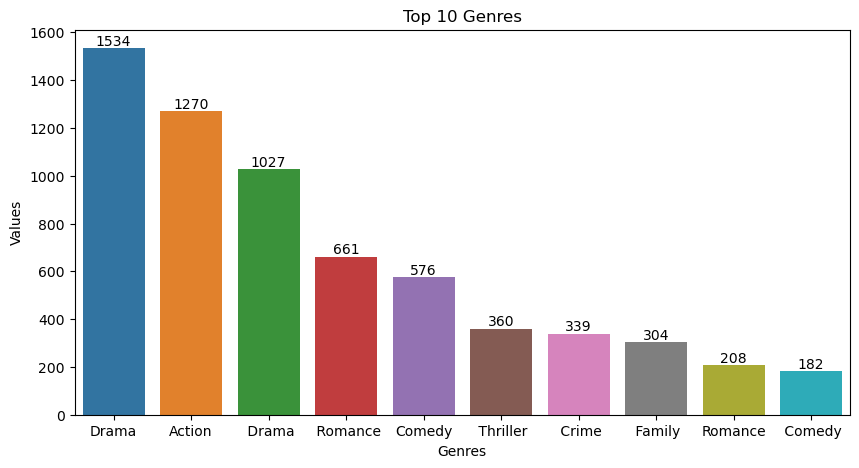

In [66]:
# Plotting the bar-graphs
top10_genres=data["Genre"].value_counts().head(10)
plt.figure(figsize=(10,5))
bar=sns.barplot(x=top10_genres.index,y=top10_genres.values)
bar.bar_label(bar.containers[0])
plt.xlabel("Genres")
plt.ylabel("Values")
plt.title("Top 10 Genres")
plt.show()

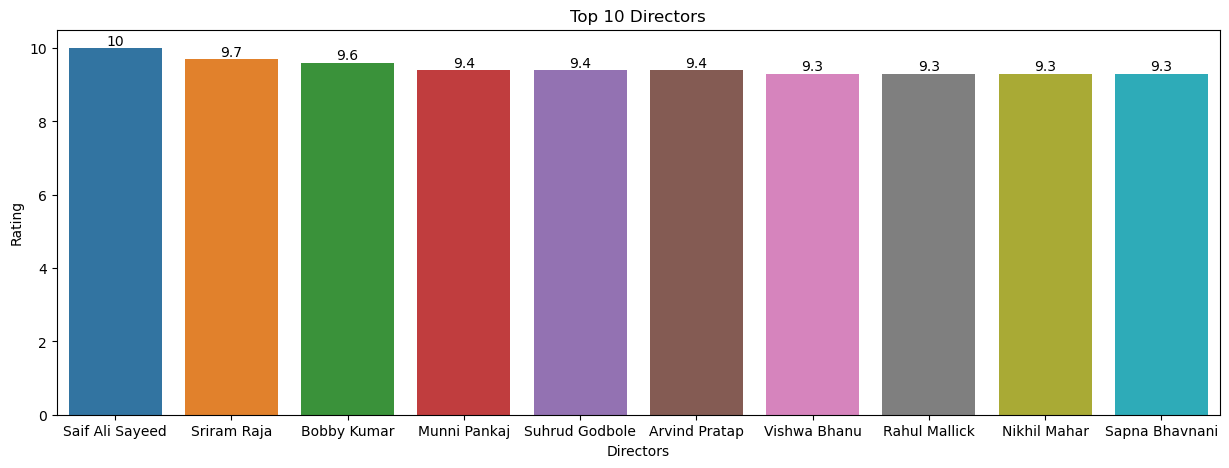

In [68]:
top10_directors=data["Director"].head(10)
plt.figure(figsize=(15,5))
bar1=sns.barplot(x=top10_directors,y=data["Rating"])
bar1.bar_label(bar1.containers[0])
plt.xlabel("Directors")
plt.ylabel("Rating")
plt.title("Top 10 Directors")
plt.show()

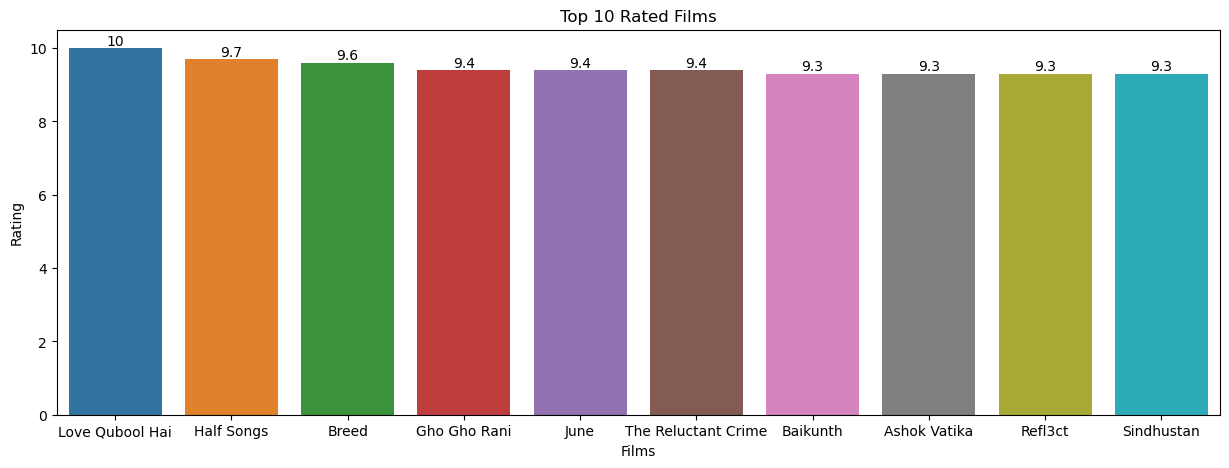

In [70]:
top10_rated_films=data["Name"].head(10)
plt.figure(figsize=(15,5))
bar2=sns.barplot(x=top10_rated_films,y=data["Rating"])
bar2.bar_label(bar2.containers[0])
plt.xlabel("Films")
plt.ylabel("Rating")
plt.title("Top 10 Rated Films")
plt.show()

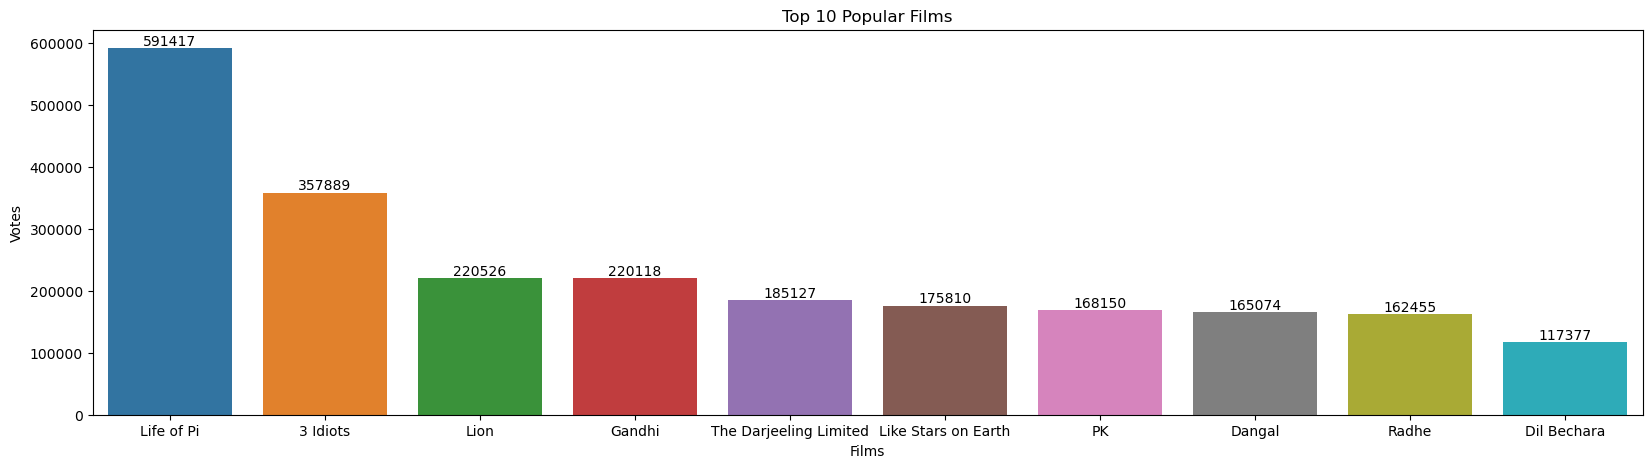

In [72]:
data.sort_values(by="Votes",ascending=False,inplace=True)
top10_popular_films=data["Name"].head(10)
plt.figure(figsize=(20,5))
bar3=sns.barplot(x=top10_popular_films,y=data["Votes"])
bar3.bar_label(bar3.containers[0])
plt.xlabel("Films")
plt.ylabel("Votes")
plt.title("Top 10 Popular Films")
plt.show()

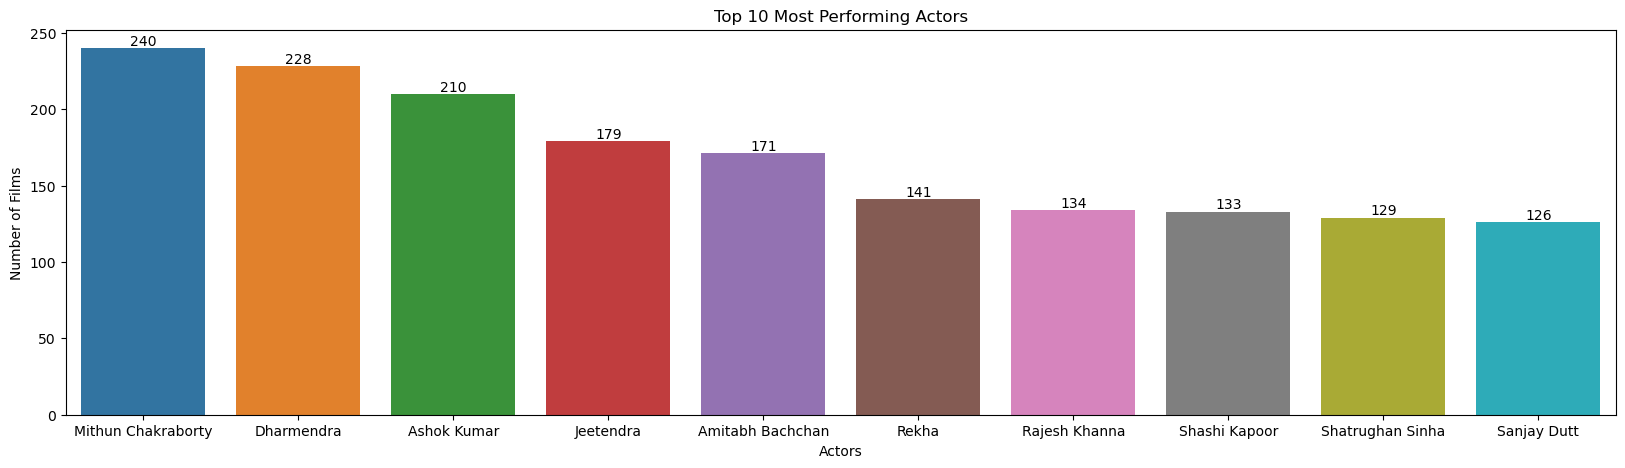

In [74]:
actors=pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
film_count=actors.value_counts()
top10_most_performing_actors=film_count.head(10)
plt.figure(figsize=(20,5))
bar4=sns.barplot(x=top10_most_performing_actors.index,y=top10_most_performing_actors.values)
bar4.bar_label(bar4.containers[0])
plt.xlabel("Actors")
plt.ylabel("Number of Films")
plt.title("Top 10 Most Performing Actors")
plt.show()

e:\Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


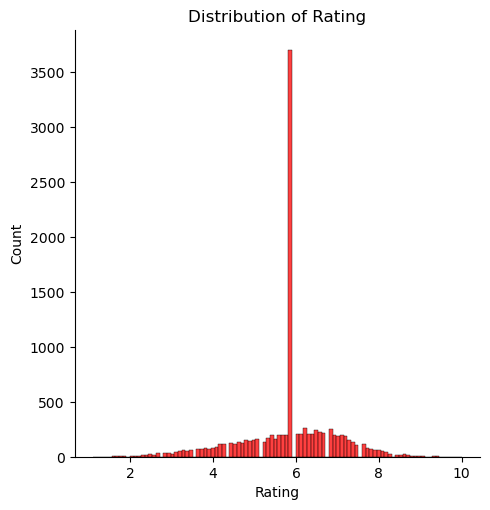

In [76]:
sns.displot(x=data["Rating"],color="red")
plt.title("Distribution of Rating")
plt.show()

e:\Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


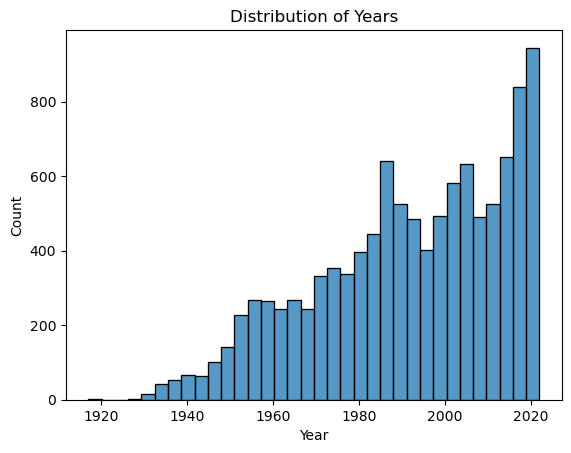

In [77]:
# Plotting the histogram
sns.histplot(x=data["Year"])
plt.title("Distribution of Years")
plt.show()

e:\Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


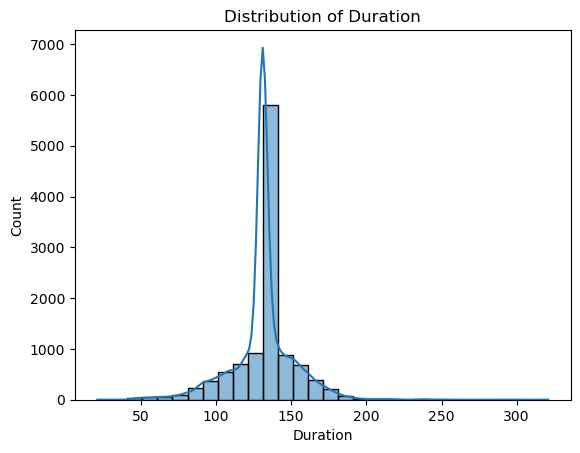

In [78]:
sns.histplot(x=data["Duration"],kde=True,bins=30)
plt.title("Distribution of Duration")
plt.show()

e:\Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


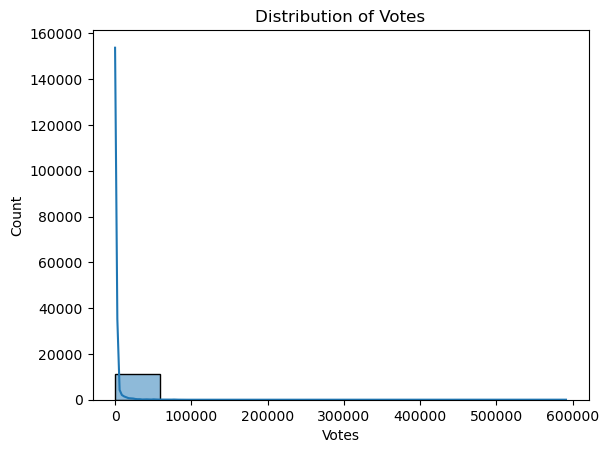

In [79]:
sns.histplot(x=data["Votes"],kde=True,bins=10)
plt.title("Distribution of Votes")
plt.show()

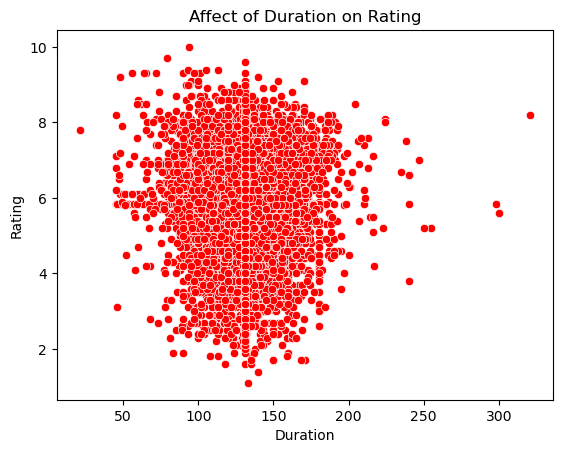

In [80]:
# Plotting the scatter graph
sns.scatterplot(x=data["Duration"],y=data["Rating"],color="red")
plt.title("Affect of Duration on Rating")
plt.show()

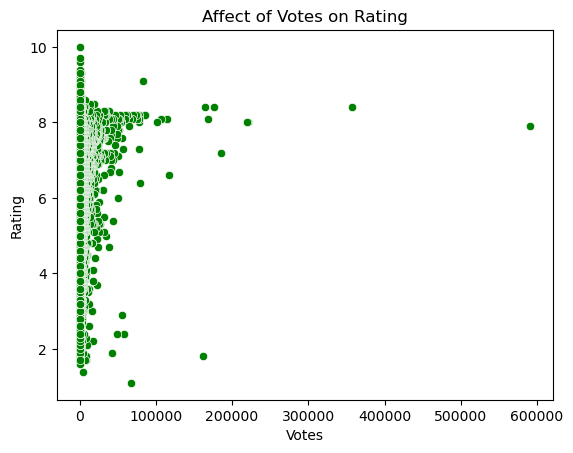

In [82]:
sns.scatterplot(x=data["Votes"],y=data["Rating"],color="g")
plt.title("Affect of Votes on Rating")
plt.show()

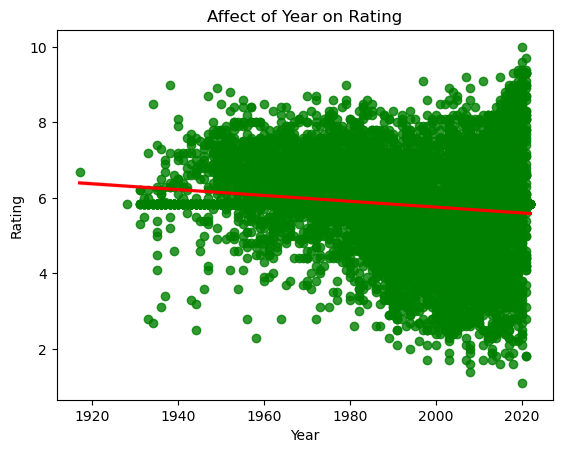

In [83]:
sns.regplot(x=data["Year"],y=data["Rating"],line_kws=dict(color="r"),scatter_kws=dict(color="green"))
plt.title("Affect of Year on Rating")
plt.show()

In [85]:
data["Genre"]=data.groupby("Genre")["Rating"].transform("mean")
data["Director"]=data.groupby("Director")["Rating"].transform("mean")
data["Actor 1"]=data.groupby("Actor 1")["Rating"].transform("mean")
data["Actor 2"]=data.groupby("Actor 2")["Rating"].transform("mean")
data["Actor 3"]=data.groupby("Actor 3")["Rating"].transform("mean")
data["Name"]=data.groupby("Name")["Rating"].transform("mean")

In [87]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8219,7.9,2012.0,127.0,5.945641,7.9,591417.0,7.90,7.900000,5.873037,7.525000
75,8.4,2009.0,170.0,5.714003,8.4,357889.0,8.06,6.827273,6.257143,8.400000
8233,8.0,2016.0,118.0,5.711748,8.0,220526.0,8.00,7.800000,8.000000,8.000000
4848,8.0,1982.0,191.0,5.812510,8.0,220118.0,8.00,8.000000,8.000000,6.450811
14038,7.2,2007.0,91.0,NaN,7.2,185127.0,7.20,5.650000,7.200000,7.200000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, 8219 to 8339
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11085 non-null  float64
 1   Year      11085 non-null  float64
 2   Duration  11085 non-null  float64
 3   Genre     8016 non-null   float64
 4   Rating    11085 non-null  float64
 5   Votes     11085 non-null  float64
 6   Director  11085 non-null  float64
 7   Actor 1   11085 non-null  float64
 8   Actor 2   11085 non-null  float64
 9   Actor 3   11085 non-null  float64
dtypes: float64(10)
memory usage: 952.6 KB


In [91]:
# Features allocation
features=data.drop("Rating",axis=1)
target=data["Rating"]

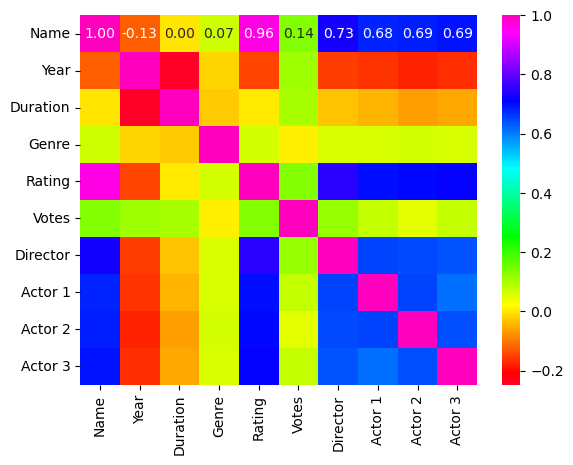

In [97]:
# Plotting the heatmap
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap='gist_rainbow')
plt.show()

In [99]:
# Droppimg duration as not a significant factor
data.drop("Duration",axis=1,inplace=True)

KeyError: "['Duration'] not found in axis"

In [101]:
features=data.drop("Rating",axis=1)

In [103]:
# Split of data into training and test data-set
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

In [105]:
x_train.shape

(7759, 8)

In [107]:
x_test.shape

(3326, 8)

In [116]:
# Model training
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [113]:
# Performance Evaluation

# Getting MSE (Mean-squared error)
mse=mean_squared_error(pred,y_test)
round(mse,2)

NameError: name 'pred' is not defined

In [118]:
score=r2_score(pred,y_test)
round(score,2)

NameError: name 'pred' is not defined

In [120]:
sns.regplot(x=y_test,y=pred,line_kws=dict(color="r"),scatter_kws=dict(color="green"))
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating")
plt.show()

NameError: name 'pred' is not defined

In [122]:
residual=y_test-pred
plt.scatter(x=pred,y=residual,c="green")
plt.xlabel("Predicted Values")
plt.ylabel("Error")
plt.title("Residual Error")
plt.show()

NameError: name 'pred' is not defined